In [11]:
import os
import shutil
import time
import tensorflow as tf
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
## RUN THE CODE CHUNK ONLY ONES OR DO NOT RUN IT IF YOU FORMATTED THE DATA CORRECTLY

# Define the current image directory
train_images = '/home/the_prove/aml/data/train_images'
# define the future directory with image subfolders 
train_images_subs = '/home/the_prove/aml/data/train_images_subs'
#run the below code if you want to create it in the current working directory
#os.makedirs(train_images_subs)

# Iterate through unique labels in the DataFrame
for label in train_df['label'].unique():
    # Create a folder for each label
    label_folder = os.path.join(train_images_subs, str(label))
    os.makedirs(label_folder, exist_ok=True)
    time.sleep(2)
    # Copy images with the specific label to the corresponding folder
    label_images = train_df[train_df['label'] == label]['image_path']
    for image_path in label_images:
        image_filename = os.path.basename(image_path)
        destination_path = os.path.join(label_folder, image_filename)
        shutil.copy(train_images+image_path, destination_path)

print("Images copied to respective folders.")


In [6]:
class_names = np.load("class_names.npy", allow_pickle=True).item()

# Load train data
train_df = pd.read_csv("train_images.csv")

In [7]:
# make sure that when you use the following line you pass class_names in the same way I did (sorted list of distinct string objects)

dataset = tf.keras.utils.image_dataset_from_directory('train_images_subs', batch_size=16, labels='inferred', class_names=train_df['label'].apply(lambda x: str(x)).unique().tolist())

Found 3926 files belonging to 200 classes.


2023-12-06 19:06:06.611514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-06 19:06:06.622461: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-06 19:06:06.622558: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-06 19:06:06.623857: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

# check if everything is alright by running below

In [8]:
data_iterator = dataset.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

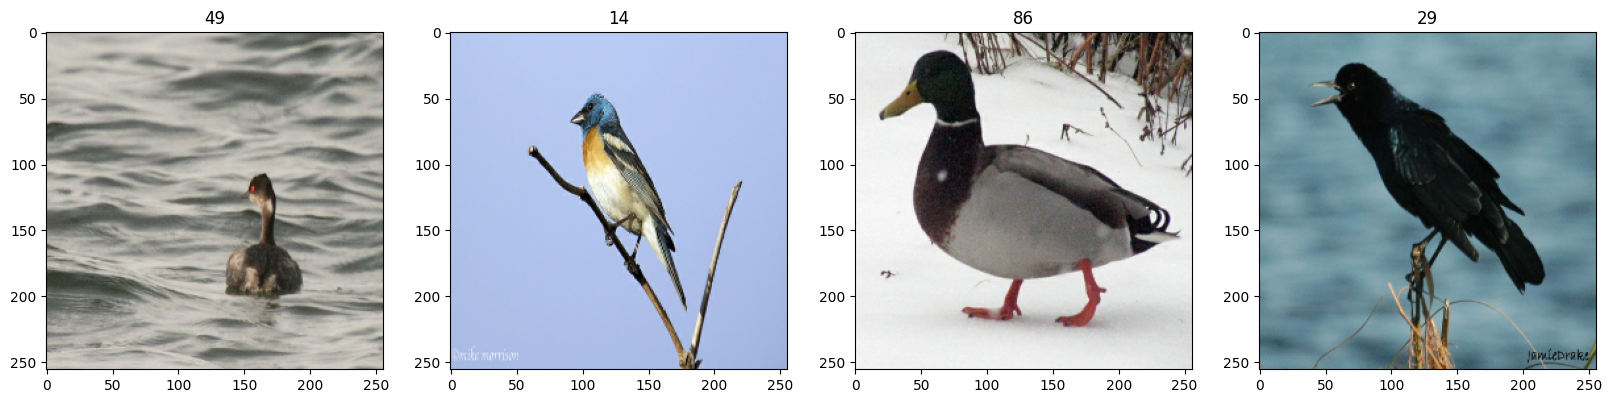

In [12]:
# it should be something like in folder 24 the class shown from the plot is 23 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])